# Analise de Cursos de Business do Udemy

Neste arquivo iremos analisar o conjunto de dados disponibilizado em: https://www.kaggle.com/jilkothari/business-courses-udemy-10k-courses , que abrange mais de 10 mil cursos da área de negócios. 

### Algumas perguntas a serem respondidas:
- Qual o curso com mais alunos?
- Existe uma relação entre o preço e as notas dadas pelos alunos?
- Clusterização de cursos pelo título?

## Análise Exploratória

In [23]:
#importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

In [7]:
#importando o dataframe e imprimindo as primeiras linhas
df = pd.read_csv('udemy_output_All_Business_p1_p626.csv')
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [10]:
#obtendo mais informações sobre o dataset
print(df.shape)

df.describe()

(9447, 20)


,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.447000e+03,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,8937.000000,9447.000000
mean,1.456603e+06,3399.298190,4.138522,4.124756,4.124756,299.054515,34.400868,0.101831,488.984111,4828.758336
std,8.956601e+05,10451.534122,0.453581,0.478410,0.478410,1826.867472,46.061088,0.580037,247.833161,3108.307674
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000
25%,6.730310e+05,141.000000,3.900000,3.879410,3.879410,12.000000,13.000000,0.000000,455.000000,1600.000000
50%,1.381806e+06,916.000000,4.200000,4.206080,4.206080,33.000000,23.000000,0.000000,455.000000,3840.000000
75%,2.154793e+06,2889.500000,4.450000,4.447495,4.447495,110.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f985cb83910>,
      dtype=object)

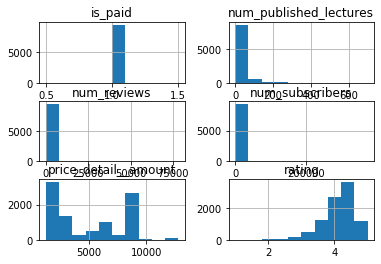

In [25]:
#separando algumas variáveis
df = df[['title', 'is_paid', 'num_subscribers', 'rating', 'num_reviews', 'num_published_lectures', 'price_detail__amount', 'price_detail__currency']]
df.hist()